In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df  = pd.read_csv("data/korea/kor_gas_day.csv", encoding='euc-kr')

In [3]:
a_df = df.loc[df.type == 'I']
print(a_df.supply.mean(), a_df.supply.std())

32080.026735458807 4686.484019639064


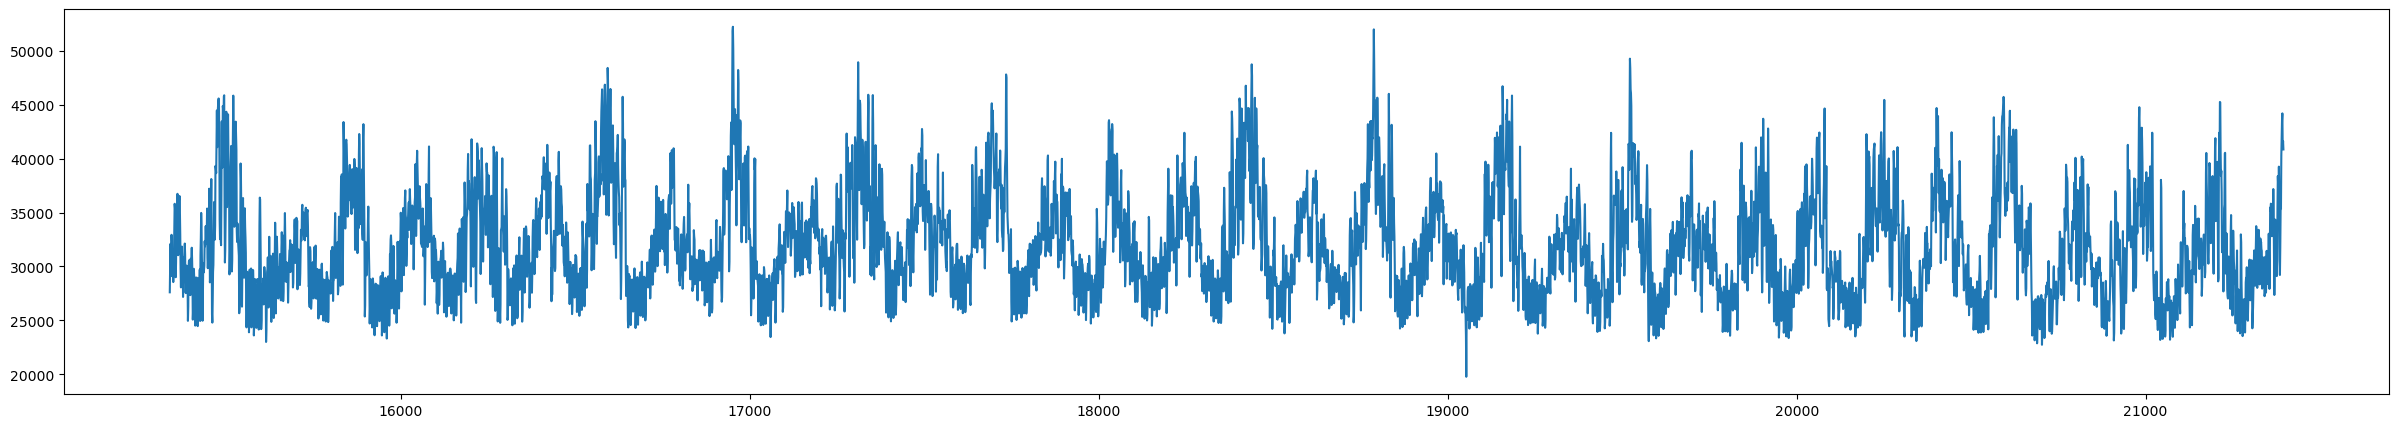

In [6]:

plt.figure(figsize=(30, 5))
plt.plot(a_df.supply)

In [7]:
from statsmodels.tsa.stattools import kpss 
import pandas as pd 

def kpss_test(timeseries): 
    print("Results of KPSS Test:") 
    kpsstest = kpss(timeseries, regression="c", nlags="auto") 
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"] ) 
    
    for key, value in kpsstest[3].items(): 
        kpss_output["Critical Value (%s)" % key] = value 
    print(kpss_output)

In [8]:
kpss_test(a_df.supply)

Results of KPSS Test:
Test Statistic            0.084554
p-value                   0.100000
Lags Used                28.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\qja19\Anaconda3\envs\co2\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [12]:
kpss_test(a_df.supply.pct_change()[1:])

Results of KPSS Test:
Test Statistic            0.086331
p-value                   0.100000
Lags Used                80.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\qja19\Anaconda3\envs\co2\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
